In [97]:
import pandas as pd
from IPython.display import display

## Read Excel

In [98]:
df = pd.read_excel("./torzskonyv_clean_dates.xlsx")
df = df[[col for col in df.columns if not col.startswith("Unnamed")]]

df

,Összes darab,Törzskönyvi szám,Megszerzés ideje,Leltárcsoport,year
0,48.0,1874/0001,1874,"2209-2211 Amerika gyűjtemény, 2212-2215 Törlés...",1874.0
1,1456.0,1874/0002,1874,"1-10 Ázsia gyűjtemény, 19-84 Ázsia gyűjtemény,...",1874.0
2,283.0,1874/0003,1874,"11-18 Ázsia gyűjtemény, 158-169 Ázsia gyűjtemé...",1874.0
3,45.0,1874/0004,1874,"235-240 Ázsia gyűjtemény, 332-334 Ázsia gyűjte...",1874.0
4,1.0,1874/0005,1874,170 Ázsia gyűjtemény,1874.0
...,...,...,...,...,...
11766,59.0,2021/0014,NaN,"2021.20.1-44 Ázsia gyűjtemény, 2021.21.1-2 Eur...",NaN
11767,1.0,2021/0015,2005,2021.23.1 Bútor gyűjtemény,2005.0
11768,2.0,2021/0016,2021-03-05 00:00:00,??? Halászat gyűjtemény,2021.0
11769,3.0,2021/0017,NaN,??? Bútor gyűjtemény,NaN


# Overal Growth per year

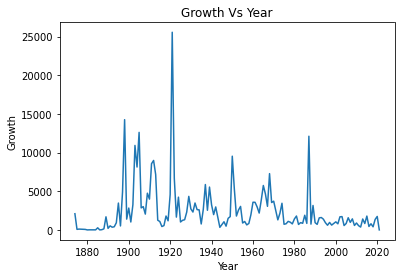

In [99]:
growth = df.groupby("year").sum()


import matplotlib.pyplot as plt
plt.plot(growth.index, growth['Összes darab'])
plt.title('Growth Vs Year')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.show()

# Growth by inventory

In [100]:
df2 = pd.read_excel("./torzskonyv_explode_count.xlsx")
df2

,index,entry,year,Megszerzés ideje,ok,drop,inventory_name,count
0,0,2209-2211 Amerika gyűjtemény,1874.0,1874,True,False,Amerika gyűjtemény,3.0
1,0,2216-2217 Amerika gyűjtemény,1874.0,1874,True,False,Amerika gyűjtemény,2.0
2,0,2222 Amerika gyűjtemény,1874.0,1874,True,False,Amerika gyűjtemény,1.0
3,0,2223-2253 Amerika gyűjtemény,1874.0,1874,True,False,Amerika gyűjtemény,31.0
4,0,2256-2258 Óceánia gyűjtemény,1874.0,1874,True,False,Óceánia gyűjtemény,3.0
...,...,...,...,...,...,...,...,...
38458,11767,2021.23.1 Bútor gyűjtemény,2005.0,2005,True,False,Bútor gyűjtemény,1.0
38459,11767,[...],2005.0,2005,True,True,NaN,NaN
38460,11768,??? Halászat gyűjtemény,2021.0,2021-03-05 00:00:00,False,False,NaN,NaN
38461,11769,??? Bútor gyűjtemény,NaN,NaN,False,False,NaN,NaN


In [101]:
growth = df2[["inventory_name", "year", "count"]].groupby(["year", "inventory_name"]).sum().unstack()
growth

count                                                        \
inventory_name Adattár Afrika gyűjtemény Amerika gyűjtemény Bútor gyűjtemény   
year                                                                           
1874.0            26.0               4.0               49.0              NaN   
1875.0             NaN               NaN               49.0              NaN   
1876.0             NaN               NaN                7.0              NaN   
1879.0             NaN              11.0                NaN              NaN   
1880.0             NaN               NaN                NaN              NaN   
...                ...               ...                ...              ...   
2017.0             NaN              78.0                4.0              1.0   
2018.0             NaN              70.0                9.0              9.0   
2019.0             NaN              84.0              127.0             51.0   
2020.0             NaN               1.0                2.0             13.0   
2021.0             NaN               NaN                NaN              NaN   

                                                                       \
inventory_name Egyházi gyűjtemény Európa gyűjtemény Fényképgyűjtemény   
year                                                                    
1874.0                        NaN              58.0             172.0   
1875.0                        NaN               NaN               NaN   
1876.0                        NaN               NaN               NaN   
1879.0                        NaN               NaN               NaN   
1880.0                        NaN               NaN               NaN   
...                           ...               ...               ...   
2017.0                        NaN              35.0               NaN   
2018.0                        8.0               5.0               NaN   
2019.0                       16.0              51.0               NaN   
2020.0                        1.0              28.0               NaN   
2021.0                        NaN               NaN               NaN   

                                                              \
inventory_name Földművelés gyűjtemény Gyűjtögetés gyűjtemény   
year                                                           
1874.0                            NaN                    NaN   
1875.0                            NaN                    NaN   
1876.0                            NaN                    NaN   
1879.0                            NaN                    NaN   
1880.0                            NaN                    NaN   
...                               ...                    ...   
2017.0                           35.0                    1.0   
2018.0                            4.0                    NaN   
2019.0                            4.0                    NaN   
2020.0                            1.0                    1.0   
2021.0                            NaN                    NaN   

                                     ...                                   \
inventory_name Hagyomány gyűjtemény  ... Rajzgyűjtemény Szokás gyűjtemény   
year                                 ...                                    
1874.0                          NaN  ...            1.0               NaN   
1875.0                          NaN  ...            NaN               NaN   
1876.0                          NaN  ...            NaN               NaN   
1879.0                          NaN  ...            NaN               NaN   
1880.0                          NaN  ...            NaN               NaN   
...                             ...  ...            ...               ...   
2017.0                          NaN  ...            NaN              16.0   
2018.0                          NaN  ...            NaN             103.0   
2019.0                          NaN  ...            NaN              21.0   
2020.0                          NaN  ...            

Index(['Adattár', 'Afrika gyűjtemény', 'Amerika gyűjtemény',
       'Bútor gyűjtemény', 'Egyházi gyűjtemény', 'Európa gyűjtemény',
       'Fényképgyűjtemény', 'Földművelés gyűjtemény', 'Gyűjtögetés gyűjtemény',
       'Hagyomány gyűjtemény', 'Halászat gyűjtemény', 'Hangszer gyűjtemény',
       'Indonézia gyűjtemény', 'Kerámia gyűjtemény', 'Közlekedés gyűjtemény',
       'Mesterség gyűjtemény', 'Nyomat gyűjtemény', 'Nyomatgyűjtemény',
       'Rajzgyűjtemény', 'Szokás gyűjtemény', 'Szokás hagyomány',
       'Textil gyűjtemény', 'Táplálkozás gyűjtemény', 'Állattartás gyűjtemény',
       'Átány gyűjtemény', 'Ázsia gyűjtemény', 'Építkezés gyűjtemény',
       'Óceánia gyűjtemény'],
      dtype='object', name='inventory_name')


C:\Users\andris\AppData\Local\Temp/ipykernel_14348/1169608237.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


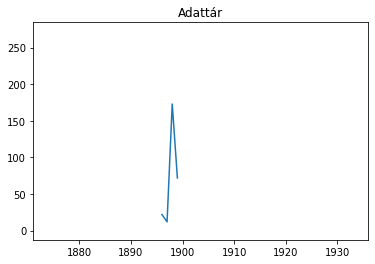

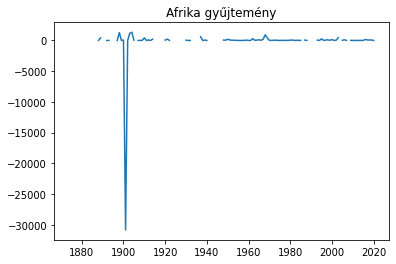

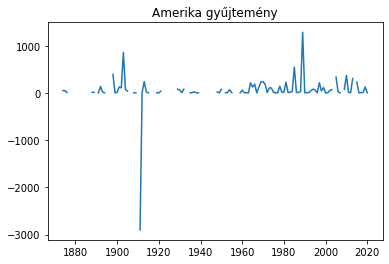

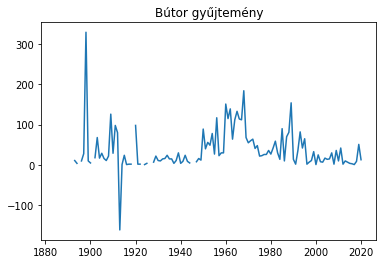

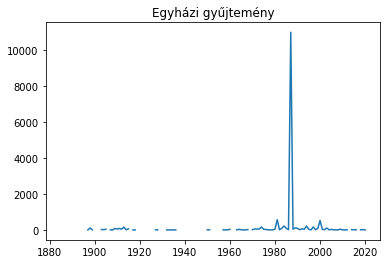

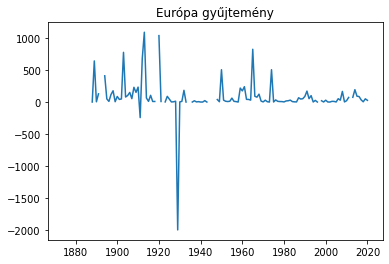

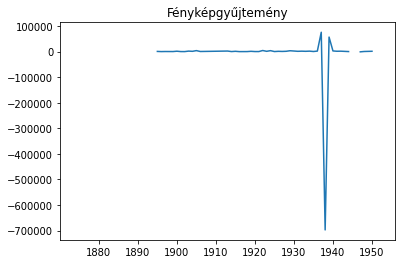

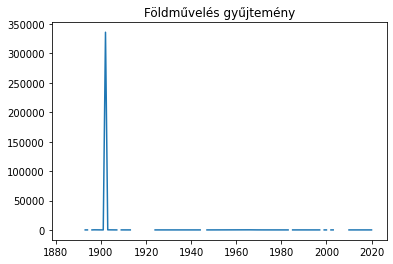

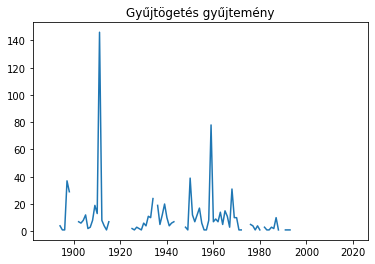

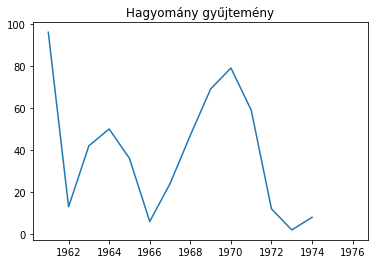

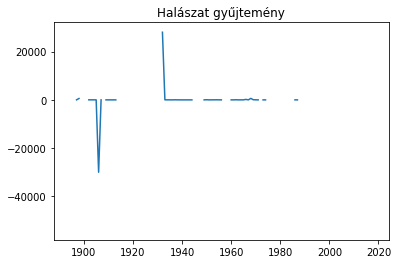

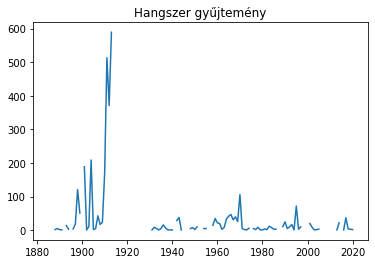

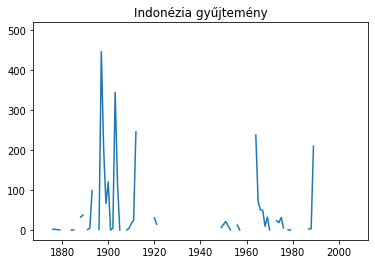

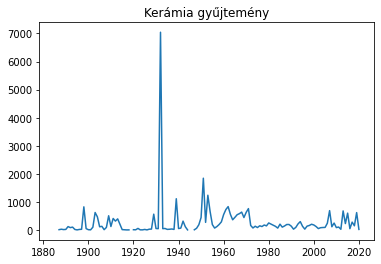

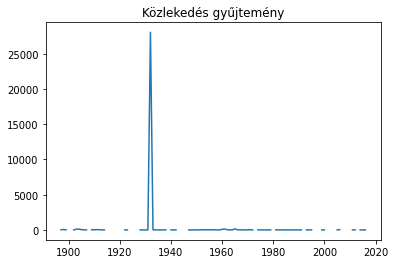

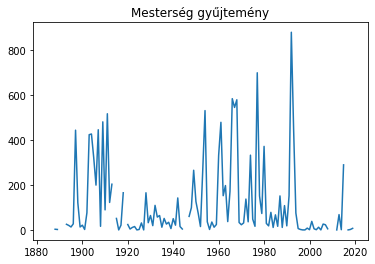

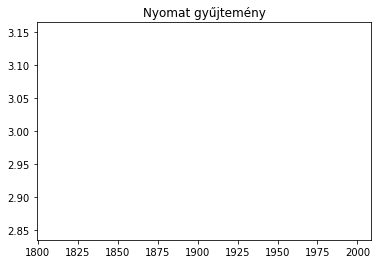

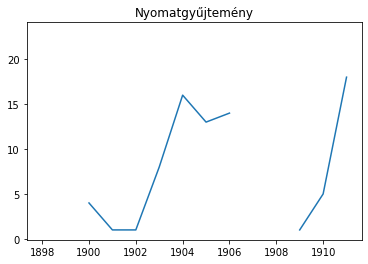

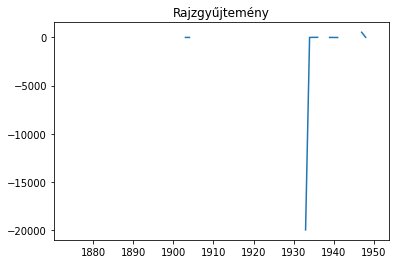

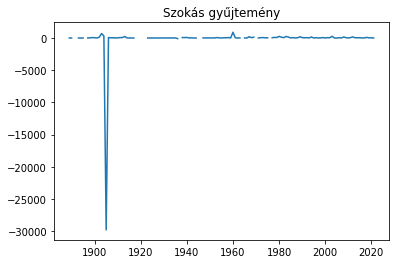

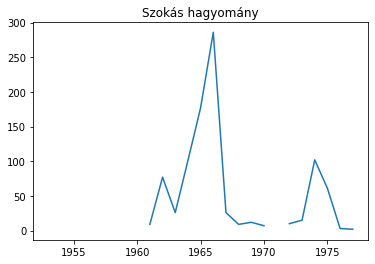

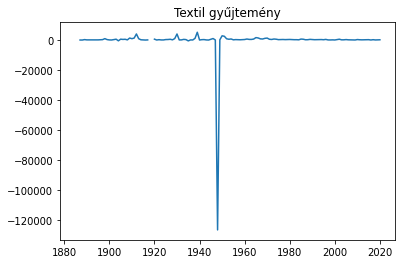

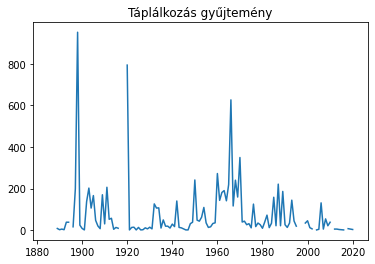

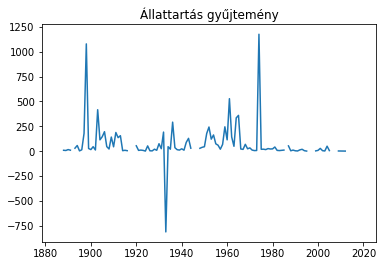

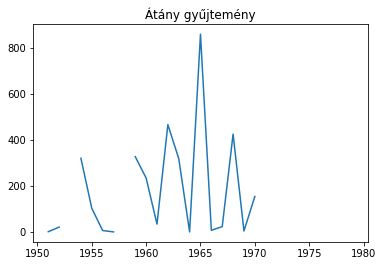

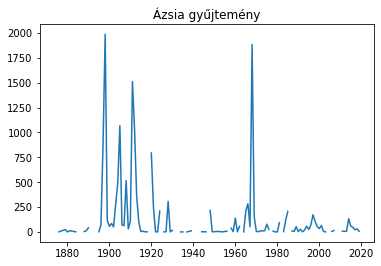

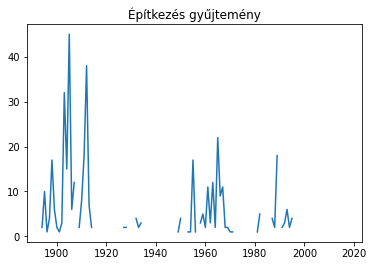

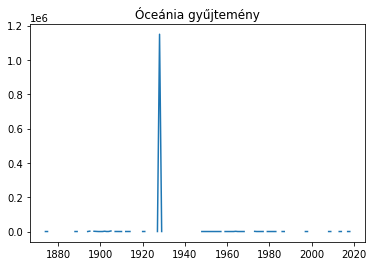

In [102]:
print(growth.columns.get_level_values(1))
for inv in growth.columns.get_level_values(1):
    plt.figure()
    plt.title(inv)
    plt.plot(growth.index, growth[('count', inv)])
    plt.savefig(f"plots/{inv}.jpg")
